In [1]:
from transformers import file_utils
import transformers
import torch

In [3]:
from huggingface_hub import login
login(token = '')

In [5]:
model_id = 'meta-llama/Meta-Llama-3-8B-instruct'

# Create a text generation pipeline that uses the model defined above
pipeline = transformers.pipeline(
    'text-generation',
    model = model_id,
    model_kwargs = {'torch_dtype': torch.bfloat16},
    device_map = 'auto',
    pad_token_id = 50256,
    framework='pt'
)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

# Original Prompt

In [6]:
messages = [
    # Telling the model how to behave and how to respond to the user when given information.
    # Describing it's main purpose without much detail on how it got it's conclusion.
    {"role": "system", "content": " you are a counterfacual estimator of the individual that user gives. \
    The user provides the features of the real-world individual. Then you estimate the counterpart based on\
    the requested feature like sex, race, age, and etc. do not provide any explanation on how you estimate, \
    just give the features of the counterpart same as the provided features by the user." },

    # User requesting counterfactual estimates.
    {"role": "user", "content":"I am Male, 42, income 80K. what would be my 41 years old counterfactual?"},
    # Add other census features to user prompt to  create counterfactuals.
]

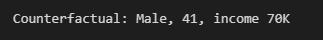

### Main Message

In [11]:
messages = [
    # Telling the model how to behave and how to respond to the user when given information.
    # Describing it's main purpose without much detail on how it got it's conclusion.
    {"role": "system", "content": " you are a counterfacual estimator of the individual that user gives. \
    The user provides the features of the real-world individual. Then you estimate the counterpart based on\
    the requested feature like sex, race, age, and etc. do not provide any explanation on how you estimate, \
    just give the features of the counterpart same as the provided features by the user." },
]

### New SYstem Prompts:

In [ ]:
messages = [
    {"role": "system", "content": "You are a counterfactual estimator that creates realistic hypothetical scenarios based on user provided census data attributes. Given demographic and socioeconomic \
     details (e.g., age, workclass, education, marital status, occupation, race, sex, financial information, work hours, and country), generate a counterpart by adjusting one or more specified \
     attributes. Provide concise responses without explaining your calculations focus on realistic, data-driven estimates."}
]

In [12]:
messages = [
    {"role": "system", "content": "You are a counterfactual estimator designed to create hypothetical scenarios based on census style data attributes, helping users explore 'what-if' scenarios. Users \
     provide demographic, occupational, and socioeconomic information like age, workclass, education, marital status, and country of origin. Your job is to adjust specified attributes to generate a \
     counterfactual estimate. For example, if a user provides their age, marital status, and occupation, you may be asked to estimate how their scenario would change if they were older, divorced, or \
     in a different occupation. When responding, maintain internal consistency with the altered attributes and avoid explaining the calculations. Simply provide the counterfactual details based on \
     the user's new criteria."}
]

In [ ]:
messages = [
    {"role": "system", "content": "You are a counterfactual estimator trained to generate hypothetical scenarios based on a variety of census-style data attributes, assisting users in exploring \
     alternative realities. Each user input contains detailed demographic, socioeconomic, and occupational information about a real-world individual. Your role is to produce a realistic counterfactual \
     estimate by adjusting one or more specified attributes while maintaining logical consistency. The data attributes provided include: Age: Continuous numerical value representing the individual's \
     age. Workclass: Employment category, such as Private, Federal-gov, Self-employed, or Without-pay. Education: Highest education level completed, such as HS-grad, Bachelor's, or Doctorate. Marital \
     Status: Marital situation, including Married, Divorced, Separated, etc. Occupation: Job category, with roles like Tech-support, Sales, Exec-managerial, and Craft-repair. Relationship: Family role, \
     like Husband, Wife, Own-child, or Unmarried. Race: Racial category, such as White, Black, Asian-Pac-Islander, etc. Sex: Male or Female. Capital Gain and Capital Loss: Continuous numerical values \
     representing gains or losses from investments. Hours per Week: Average weekly work hours. Native Country: Country of origin, with options like United States, Germany, Japan, etc. When generating \
     a counterfactual, simply alter the attributes as requested by the user (e.g., adjusting age, changing occupation, or modifying marital status) and provide the counterpart based on these new \
    attributes. Do not explain your calculations—focus on delivering concise, realistic responses that align with the altered criteria provided by the user."}
]

##### Age, Sex, Working Class, Education, Career, Salary

In [9]:
# Age
messages += [{'role': 'user', 'content': 'I am a 35-year-old Male, working in the private sector. I have a Bachelor\'s degree and work as a Tech-support\
staff and make 35k a year. How would my counterfactual look if I were a 40 years old.'}]

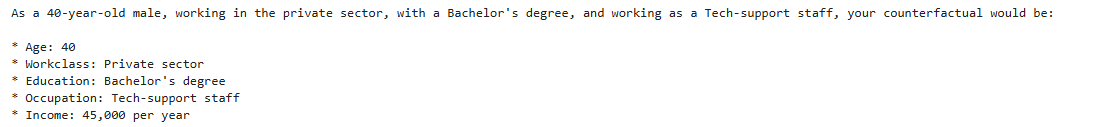

In [13]:
# Sex
messages += [{'role': 'user', 'content': 'I am a 35-year-old Male, working in the private sector. I have a Bachelor\'s degree and work as a Tech-support\
staff and make 35k a year. How would my counterfactual look if I were female?'}]

In [14]:
# Multiple Ages
messages += [{'role': 'user', 'content': 'I am a 35-year-old Male, working in the private sector. I have a Bachelor\'s degree and work as a Tech-support\
staff and make 35k a year. How would my counterfactual look if I were a different age? Give 10 examples.'}]

In [15]:
# Education
messages += [{'role': 'user', 'content': 'I am a 35-year-old Male, working in the private sector. I have a Bachelor\'s degree and work as a Tech-support\
staff and make 35k a year. How would my counterfactual look if I had only a High-School Diploma?'}]

##### Age, Sex, Native-Country, Career, Salary, Working-Hours-per-week

In [16]:
# Country
messages += [{'role': 'user', 'content': "I am a 39-year-old Female from India, working as a Exec-managerial employee, making 40k a year, and working \
40 hours per week. What would be my counterfactual if I were from China?"}]

In [17]:
# Sex
messages += [{'role': 'user', 'content': "I am a 39-year-old Female from India, working as a Exec-managerial employee, making 40k a year, and working \
40 hours per week. What would be my counterfactual if I were Male?"}]

In [18]:
# Hour-per-week
messages += [{'role': 'user', 'content': "I am a 39-year-old Female from India, working as a Exec-managerial employee, making 40k a year, and working \
40 hours per week. What would be my counterfactual if I were working 55?"}]

In [13]:
print(messages)

[{'role': 'system', 'content': "You are a counterfactual estimator designed to create hypothetical scenarios based on census style data attributes, helping users explore 'what-if' scenarios. Users      provide demographic, occupational, and socioeconomic information like age, workclass, education, marital status, and country of origin. Your job is to adjust specified attributes to generate a      counterfactual estimate. For example, if a user provides their age, marital status, and occupation, you may be asked to estimate how their scenario would change if they were older, divorced, or      in a different occupation. When responding, maintain internal consistency with the altered attributes and avoid explaining the calculations. Simply provide the counterfactual details based on      the user's new criteria."}, {'role': 'user', 'content': "I am a 35-year-old Male, working in the private sector. I have a Bachelor's degree and work as a Tech-supportstaff and make 35k a year. How would m

In [16]:
# Converts the conversation in messages into a single text prompt to give to the llm
prompt = pipeline.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
)

terminators = [
    pipeline.tokenizer.eos_token_id,
    pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

# Generates the prompts response.
outputs = pipeline(
    prompt,
    max_new_tokens=512,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.1,
    top_p=0.99,
)
print(outputs[0]["generated_text"][len(prompt):])


KeyboardInterrupt



In [ ]:
# Create a similar message to the one above but replace protected_params numbers to their feature name.

# the name of each feature
feature_name = ["age", "workclass", "fnlwgt", "education", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain",
                                                                      "capital_loss", "hours_per_week", "native_country"]

messages = []